# Task 7 : MLP

## Import de tous les modules nécessaires

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf
import os, os.path
import random

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import model_from_json


from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode

import io
import cv2 # OpenCV library
from google.colab.patches import cv2_imshow

## Import de google drive 

Cette étape permet d'avoir accès aux photos prises dans la Task6

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Choix des images

La première fois que j'ai entrainé mon réseau de neurones, j'avais de très bons résultats sur les images que j'avais prises initialement (j'ai séparer mes images en 3 sets). Par exemple j'avais initialement 500 images de test et j'en prédisais mal 2. Et pour mon réseau accuracy et val_accuracy étaient toujours supérieur à 0.95.
Cependant quand j'ai voulu passer à la tâche 8, j'avais de très mauvais résultats avec les images prises en direct. J'ai donc décidé de reprendre de nouvelles images pour diversifier mon dataset. 

In [ ]:
!cp /content/drive/MyDrive/MAM4/S2/TORES-ComputerVision/Zip/My_dataset_16.zip . #copie de mon dataset

In [ ]:

!unzip /content/My_dataset_16.zip -d dataset_16 #extraction de mon dataset

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: dataset_16/My_dataset_16/C_16/496.jpg  
  inflating: dataset_16/My_dataset_16/U_16/490.jpg  
  inflating: dataset_16/My_dataset_16/C_16/494tournee.jpg  
  inflating: dataset_16/My_dataset_16/C_16/493.jpg  
  inflating: dataset_16/My_dataset_16/C_16/489.jpg  
  inflating: dataset_16/My_dataset_16/C_16/491tournee.jpg  
  inflating: dataset_16/My_dataset_16/C_16/490.jpg  
  inflating: dataset_16/My_dataset_16/C_16/494.jpg  
  inflating: dataset_16/My_dataset_16/C_16/490tournee.jpg  
  inflating: dataset_16/My_dataset_16/C_16/488tournee.jpg  
  inflating: dataset_16/My_dataset_16/B_16/495.jpg  
  inflating: dataset_16/My_dataset_16/C_16/491.jpg  
  inflating: dataset_16/My_dataset_16/B_16/496tournee.jpg  
  inflating: dataset_16/My_dataset_16/C_16/488.jpg  
  inflating: dataset_16/My_dataset_16/C_16/493tournee.jpg  
  inflating: dataset_16/My_dataset_16/C_16/492tournee.jpg  
  inflating: dataset_16/M

## Ecriture des images sous forme de fichier

Nous allons écrire les images $16 \times 16$ dans un fichier txt.

Pour cela nous allons créer la fonction **images_to_file** qui parcourt un dossier et qui écrit dans un fichier .txt les images sous forme de liste de numéros.

Je renomme les classes de mes images : 

In [ ]:
!mv /content/dataset_16/My_dataset_16/B_16 /content/dataset_16/My_dataset_16/B
!mv /content/dataset_16/My_dataset_16/C_16 /content/dataset_16/My_dataset_16/C
!mv /content/dataset_16/My_dataset_16/E_16 /content/dataset_16/My_dataset_16/E
!mv /content/dataset_16/My_dataset_16/S_16 /content/dataset_16/My_dataset_16/S
!mv /content/dataset_16/My_dataset_16/U_16 /content/dataset_16/My_dataset_16/U

In [ ]:
chemin_16 = '/content/dataset_16/My_dataset_16' # chemin pour acceder au dataset

### Quelques exemples d'images de mon dataset : 

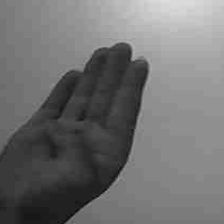

In [ ]:
im = Image.open('/content/drive/MyDrive/MAM4/S2/TORES-ComputerVision/My_dataset_224/B_224/600.jpg')
im

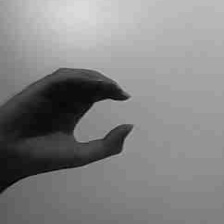

In [ ]:
im = Image.open('/content/drive/MyDrive/MAM4/S2/TORES-ComputerVision/My_dataset_224/C_224/600.jpg')
im

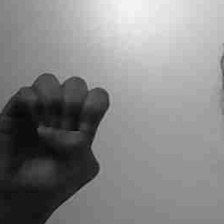

In [ ]:
im = Image.open('/content/drive/MyDrive/MAM4/S2/TORES-ComputerVision/My_dataset_224/E_224/600.jpg')
im

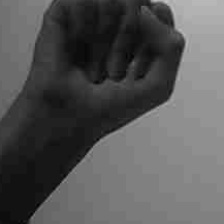

In [ ]:
im = Image.open('/content/drive/MyDrive/MAM4/S2/TORES-ComputerVision/My_dataset_224/S_224/600.jpg')
im

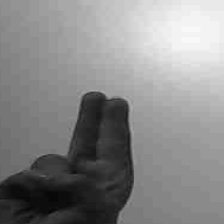

In [ ]:
im = Image.open('/content/drive/MyDrive/MAM4/S2/TORES-ComputerVision/My_dataset_224/U_224/600.jpg')
im

Lorsque j'ai fait de nouvelles images j'ai oublié de faire une image (la 501) donc je copie une autre image pour qu'il n'y ai pas d'erreur d'execution par la suite.

In [ ]:
!cp /content/dataset_16/My_dataset_16/C/493.jpg /content/dataset_16/My_dataset_16/C/501.jpg
!cp /content/dataset_16/My_dataset_16/C/493.jpg /content/dataset_16/My_dataset_16/C/501tournee.jpg

On va passer à l'écriture des images dans un fichier.

In [ ]:
def images_to_file(chemin, fichier):
  """Prend en argument
  chemin : le chemin du dossier dans lequel ce trouve nos images
  fichier : le chemin du fichier dans lequel on souhaite ecrire les images
  
  Ecris les images sous forme de tableau dans le fichier"""
  
  # nombre d'images dans le dossier
  nb_photo = len([name for name in os.listdir(chemin) if os.path.isfile(os.path.join(chemin, name))])
  nb_photo = int(nb_photo/2)

  #ouverture du fichier dans lequel on écrit
  f = open(fichier, "a")
  
  # on parcourt toutes les images 
  for i in range(nb_photo):
  
    # on ouvre l'image
    nom_img = chemin + '/' + str(i) + '.jpg'
    image = Image.open(nom_img)
    
    # on ouvre l'image tournée
    nom_img2 = chemin + '/' + str(i) + 'tournee.jpg'
    image_tournee = Image.open(nom_img2)
    
    # on transforme les image en tableau
    img_array = np.array(image).reshape((16*16,))
    img_array_tournee = np.array(image_tournee).reshape((16*16,))
    
    # on écrit dans le fichier

    t1 = str(img_array)
    t1 = t1[1:-1]
    t1 = t1.replace("\n",'')

    t2 = str(img_array_tournee)
    t2 = t2[1:-1]
    t2 = t2.replace("\n",'')

    ligne = chemin[-1] + " " + t1 + "\n"
    f.write(ligne)
    ligne2 = chemin[-1] + " " + t2 + "\n"
    f.write(ligne2)


  # on ferme le fichier
  f.close()


## Création de notre fichier pour toutes les lettres.

In [ ]:
lettres = ['B','C','E','S','U'] # tableau contenant les lettres dont on a des images

Pour chaque lettre, on va écrire toutes les images correspondantes dans un fichier qu'on appelle essai2.txt

In [ ]:
for l in lettres:
  images_to_file(chemin_16+'/'+l, '/content/essai2.txt')

## Mélange aléatoire des lignes

On mélange les lignes pour éviter d'avoir que des S dans le training set par exemple.

In [ ]:
lines = open('/content/essai2.txt').readlines()
random.shuffle(lines)
open('/content/essai2.txt', 'w').writelines(lines)

## Chargement de notre dataset

In [ ]:
def load_dataset(dataset_file_path):
  """fonction qui lit le fichier d'images et sépare les images de leur classe"""
  a = np.loadtxt(dataset_file_path, converters={0:lambda ch : ord(ch)-ord('A')}) #permet de lire ligne par ligne et de convertir la lettre en numéro
  samples, letters = a[:,1:], a[:,0] # sépare l'image du numéro de la lettre
  return samples, letters

In [ ]:
dataset_file_path = '/content/essai2.txt'
samples, letters = load_dataset(dataset_file_path)


Pour pouvoir mettre le nombre de classe à 5, il faut qu'on change la valeur de la classe des lettres par exemple : 

B = 1 ->0

C = 2 ->1

E = 4 -> 2

S = 18 -> 3

U = 20 -> 4

In [ ]:
lettre_dico = {0 : 'B', 1 : 'C', 2 : 'E', 3 : 'S', 4 : 'U'}


On va remplacer les caractères 'B','C',... par des 0,1,... dans le vecteur **letters**.

In [ ]:
ref = np.unique(letters)
n = len(ref)

new_val = range(5)
for i in range(n):
  letters = np.where(letters==ref[i], i, letters) #transforme les (B,C,E,S,U) en (0,1,2,3,4) du vecteur qui stocke les classes

## séparer en training set, validation test et testing test
On sépare en 3 parties : 
1. training set -> 0.6%
2. validation set -> 0.3%
3. test set -> 0.1%

In [ ]:
train_ratio = 0.6
val_ratio = 0.3
# calcul des indices de separation
n_train_samples = int(len(samples) * train_ratio)
n_val_samples = n_train_samples + int(len(samples) * val_ratio)

#separation des donnees
x_train, y_train = samples[:n_train_samples], letters[:n_train_samples]
x_val, y_val = samples[n_train_samples:n_val_samples], letters[n_train_samples:n_val_samples]
x_test, y_test = samples[n_val_samples:], letters[n_val_samples:]

print(len(x_train) ,"images pour le training set")
print(len(x_val),"images pour le validation set")
print(len(x_test),"images pour le test set")

3606 images pour le training set
1803 images pour le validation set
601 images pour le test set


In [ ]:
num_classes = 5 # 5 lettres à prédire


x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_val /= 255

# conversion si la classe est 1 on aura maintenant le vecteur [0,1,0,0,0]
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)


[0. 1. 0. 0. 0.]


Pour créer notre modèle MLP nous allons utiliser uniquement des couches dense, car par définition un MLP est uniquement composé de couches dense. Et des couches Dropout qui permetent d'éviter le sur-entrainement en mettant 20% des poids des neurones de la couche à 0

In [ ]:

# Création du model ML
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(256,))) #couche dense
model.add(Dropout(0.2)) # on met 20% des poids des neurones à 0
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax')) #En prend num_classes car on a num_classes à prédire

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               25700     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 5)                

In [ ]:

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Pour éviter le sur-entrainement, j'ai rajouté la ligne suivante qui permet d'arrêter l'apprentissage si la val_loss ne diminue pas en 3 itérations. Car si on continue de s'améliorer sur le test set mais pas sur le validation test cela veut dire que notre réseau est sur-entrainé et sera mauvais sur de nouvelles données.

In [ ]:
accuracy_val = [] #vecteur qui stocke la validation accuracy au court des modifications du modèle.

In [ ]:
#notre entrainement s'arrete si val_loss ne diminue plus en 2 étapes
my_callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=2) ]
epochs = 30 # nombre de fois on notre réseau va faire passer tout le testing set
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=1, # affichage durant le training
                    batch_size=100, # taille de notre mini-batch
                    validation_data=(x_val, y_val), # dataset sur lequel effectuer la validation 
                    callbacks = my_callbacks) 



Epoch 1/30
37/37 [==============================] - 0s 7ms/step - loss: 0.0709 - accuracy: 0.9770 - val_loss: 0.0385 - val_accuracy: 0.9922
Epoch 2/30
37/37 [==============================] - 0s 7ms/step - loss: 0.0584 - accuracy: 0.9789 - val_loss: 0.2626 - val_accuracy: 0.9140
Epoch 3/30
37/37 [==============================] - 0s 6ms/step - loss: 0.0568 - accuracy: 0.9847 - val_loss: 0.0715 - val_accuracy: 0.9789


In [ ]:
score = model.evaluate(x_val, y_val, verbose=0) # récupération des différents score
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
accuracy_val.append(score[1])

Validation loss: 0.038053423166275024
Validation accuracy: 0.9911258816719055


In [ ]:
print(accuracy_val)

[0.7581807971000671, 0.981142520904541, 0.9711591601371765, 0.9572933912277222, 0.9833610653877258, 0.9911258816719055]


Pour améliorer mon réseau j'ai d'abord regarder ce qu'il se passait si je changeais la taille du batch.\
Ensuite j'ai essayé de rajouté 2 couches : dense_8 et dropout_6.\
 Ensuite dans le callbacks j'ai changé pour restreindre à 2 étapes.\
J'ai eu les valeurs d'accuray suivantes pour le set de validation : \
[0.7581807971000671, 0.981142520904541, 0.9711591601371765, 0.9572933912277222, 0.9833610653877258, 0.9911258816719055]

Pour améliorer encore mon modèle j'aurais surement du ajouter plus de variétés dans mon dataset. J'aurais également pu ajouter plus de couche à mon réseau.

Je vais maintenant tester mon modèle sur mon testing set. Pour cela je prépare d'abord les données.

In [ ]:
x_test = x_test.astype('float32')
x_test /= 255
y_test = keras.utils.to_categorical(y_test, num_classes)

(601, 256)


La commande np.argmax permet de récupérer l'indice du maximum, qui est la classe prédite.

In [ ]:
y_predict = np.argmax(model.predict(x_test),axis = 1)

In [ ]:
y_test_cat = np.argmax(y_test,axis = 1)
erreur = y_predict - y_test_cat

In [ ]:
print("L'erreur en norme L2 est de :",np.linalg.norm(erreur))

6.782329983125268


In [ ]:
print("Ce qui correspond à : ",np.shape(np.where(erreur != 0)), "images")

(1, 13)


Sur nos 601 images, nous en avons mal prédit 13

---



Maintenant que nous sommes satisfait de notre modele nous allons l'enregistrer : 

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_weights.h5")
print("Saved model to disk")

Saved model to disk


# Task 8 avec le modèle MLP

## Test de notre MLP avec de nouvelles images 



J'importe le modèle qui correspond au meilleur modèle que j'ai obtenu lors de la phase d'entrainement.

In [ ]:
!cp /content/drive/MyDrive/MAM4/S2/TORES-ComputerVision/Modeles/model_weights_MLP.h5 .
!cp /content/drive/MyDrive/MAM4/S2/TORES-ComputerVision/Modeles/model_MLP.json .

In [ ]:

# load json and create model
json_file = open('/content/drive/MyDrive/MAM4/S2/TORES-ComputerVision/Modeles/model_MLP.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("/content/drive/MyDrive/MAM4/S2/TORES-ComputerVision/Modeles/model_weights_MLP.h5")

On reprend ce qu'on a fait pour les TP précédents : 

In [ ]:
%cd /content
!git clone https://github.com/opencv/opencv/
%cd opencv/samples/python

/content
Cloning into 'opencv'...
remote: Enumerating objects: 291346, done.
remote: Counting objects: 100% (353/353), done.
remote: Compressing objects: 100% (265/265), done.
remote: Total 291346 (delta 135), reused 213 (delta 76), pack-reused 290993
Receiving objects: 100% (291346/291346), 483.04 MiB | 32.74 MiB/s, done.
Resolving deltas: 100% (202487/202487), done.
Checking out files: 100% (6797/6797), done.
/content/opencv/samples/python


In [ ]:
from google.colab.output import eval_js

def VideoCapture():
  """fonction qui permet d'utilier notre camera"""
  js = Javascript('''
    async function create(){
      div = document.createElement('div');
      document.body.appendChild(div);

      video = document.createElement('video');
      video.setAttribute('playsinline', '');

      div.appendChild(video);
      stream = await navigator.mediaDevices.getUserMedia({video: {facingMode: "environment"}});
      video.srcObject = stream;

      await video.play();

      canvas =  document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      div_out = document.createElement('div');
      document.body.appendChild(div_out);
      img = document.createElement('img');
      div_out.appendChild(img);
    }

    async function capture(){
        return await new Promise(function(resolve, reject){
            pendingResolve = resolve;
            canvas.getContext('2d').drawImage(video, 0, 0);
            result = canvas.toDataURL('image/jpeg', 0.20);

            pendingResolve(result);
        })
    }

    function showimg(imgb64){
        img.src = "data:image/jpg;base64," + imgb64;
    }

  ''')
  display(js)

In [ ]:
def b64_to_bytes(byte):
  jpeg = b64decode(byte.split(',')[1])
  im = Image.open(io.BytesIO(jpeg))
  return np.array(im)

def bytes_to_b64(image):
  image = Image.fromarray(image)
  buffer = io.BytesIO()
  image.save(buffer, 'jpeg')
  buffer.seek(0)
  x = b64encode(buffer.read()).decode('utf-8')
  return x

In [ ]:
# Load cascades using cv2.CascadeClassifier
face_cascade = cv2.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_frontalface_default.xml')

In [ ]:
def show_hist(hist):
  bin_count = hist.shape[0]
  bin_w = 24
  img = np.zeros((256, bin_count*bin_w, 3), np.uint8)
  for i in range(bin_count):
      h = int(hist[i])
      cv2.rectangle(img, (i*bin_w+2, 255), ((i+1)*bin_w-2, 255-h), (int(180.0*i/bin_count), 255, 255), -1)
  img = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)
  cv2_imshow(img)

In [ ]:
def detect_faces(img, cascades):
  """trouve les visages dans une image"""
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = cascades.detectMultiScale(gray, 1.3, 4)
  return faces

In [ ]:
VideoCapture()
eval_js('create()')

while True:
  response = input("Type anything when ready!:")
  byte = eval_js('capture()')
  im = b64_to_bytes(byte)
  im_copy = im.copy()
  faces = detect_faces(im, face_cascade)

  if len(faces) == 1:
    face = faces[0]
    cv2.rectangle(im_copy,(face[0],face[1]),(face[0] + face[2], face[1] + face[3]),(0,255,0),2)
  else:
    continue

  eval_js('showimg("{}")'.format(bytes_to_b64(im_copy)))
  response = input("Use this bounding box? [y or n]:")
  if response == 'y':
    frame = im[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]
    eval_js('showimg("{}")'.format(bytes_to_b64(frame)))
    #zone de notre visage
    tracking_window_face = face
    break

<IPython.core.display.Javascript object>

Type anything when ready!:y
Use this bounding box? [y or n]:y


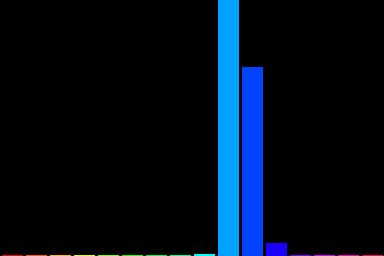

In [ ]:
# on passe du domaine RGB au domaine HSV
frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#Creation d'un mask: on limite la saturation entre 64 et 255, la brillance entre 32 et 200
mask = cv2.inRange(frame_hsv, np.array((0.,64.,32.)), np.array((180.,255.,200.)))


# Calcul d'un histogramme de la zone de visage uniquement sur le canal de teinte (="hue")
# on utilise le mask calculé précédemment
# on veut 16 catégories qui vont de 0 à 180
frame_hist = cv2.calcHist([frame_hsv], [0], mask, [16], [0,180])

# On normalise l'histogramme entre 0 et 255 grâce à `cv.NORM_MINMAX`
frame_hist = cv2.normalize(frame_hist, frame_hist, 0,255,cv2.NORM_MINMAX)


# On transforme l'histogramme en 1-D array
frame_hist = frame_hist.reshape(-1)

# On affiche l'histogramme
from google.colab.patches import cv2_imshow
show_hist(frame_hist)

In [ ]:
def scale_contour(pts, scale_x, scale_y):
  "fonction qui permet de redimensionner le rectangle"
  M = cv2.moments(pts)

  if M['m00'] == 0:
    return pts
  cx = int(M['m10']/M['m00'])
  cy = int(M['m01']/M['m00'])

  cnt_norm = pts - [cx, cy]
  cnt_scaled = cnt_norm * np.array([scale_x, scale_y])
  cnt_scaled = cnt_scaled + [cx, cy]
  cnt_scaled = cnt_scaled.astype(np.int32)

  return cnt_scaled

def crop_hand(pts, im_w, im_h):
  """Le but de cette fonction est de construire un rectangle qui n'est pas tourné et qui ne dépasse pas de l'image """
  # pour l'abscisse du point en haut à gauche on prend le max entre 0 et la plus petite abscisse dans pts, idem avec l'ordonnee
  x_hg , y_hg = max(0,min(pts[:,0])), max(0,min(pts[:,1]))
  # pour l'abscisse du point en bas à droite, on prend le min entre la largeur de l'image et la plus grande abscisse dans pts
  x_bd, y_bd = min(im_w,max(pts[:,0])), min(im_h,max(pts[:,1]))
  return (x_hg,y_hg),(x_bd,y_bd)




In [ ]:
from PIL import ImageDraw
# font
font = cv2.FONT_HERSHEY_SIMPLEX
  
# org
org = (50, 50)
  
# fontScale
fontScale = 1

VideoCapture()
eval_js('create()')

# Critère d'arrêt : 
#  si on a fait 10 itération
# ou
#  si la moyenne calculée ne bouge plus assez 
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )


byte = eval_js('capture()') # prend une capture
im = b64_to_bytes(byte) # transformation
im_w = im.shape[1] # largeur de l'image
im_h = im.shape[0] # hauteur de l'image
tracking_window_hand = (0,0,im_w, im_h)
cpt = -1
while cpt < 10:
  byte = eval_js('capture()') # Take a capture
  img = b64_to_bytes(byte)

  # On passe du domaine RGB au domaine HSV
  hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

  #Creation d'un mask: on limite la saturation entre 64 et 255, la brillance entre 32 et 200
  mask = cv2.inRange(hsv, np.array((0.,64.,32.)), np.array((180.,255.,200.)))


  # On projette l'histogramme de la zone de visage sur l'image. 
  # On utilise uniquement le canal 0 (=Hue), entre 0 et 180 avec une échelle de 1
  prob = cv2.calcBackProject([hsv] , [0], frame_hist, [0,180], scale = 1)
  
  # bit a bit entre la projection et le mask pour enlever les pixel trop brillant ou trop foncé
  prob = prob & mask
  

  # on calcule le camshift
  bbox, tracking_window_face = cv2.CamShift(prob, tracking_window_face , term_crit)

  # permet d'augmenter la taille du rectangle pour être certain de couvrir tout notre visage
  pts = cv2.boxPoints(bbox).astype(np.int)
  sc = scale_contour(pts, 1.5, 1.5)
  # met notre visage en noir 
  cv2.fillPoly(prob, [sc], 0) 

  # on regarde ou se trouve notre visage
  (x,y,w,h) = tracking_window_face

  #on va mettre en noir le dessus et dessous de notre tête
  margin = 10
  lignes_bas = max(0, y-margin)
  lignes_haut = min(im_h, y+h+margin)
  col_bas = max(0, x-margin)
  col_haut = min(im_w, x+w+margin)
  

  #on met en noir toute la zone au dessus de notre tete
  prob[0:lignes_bas, 0:im_w] = 0

  #on met en noir toute la zone en dessous de notre tete
  prob[lignes_haut:im_h, 0:im_w] = 0
  

  #detection de la main
  bbox2, tracking_window_hand = cv2.CamShift(prob, tracking_window_hand, term_crit)
  
  # on ajuste la taille de la boite autour de notre main
  pts2 = cv2.boxPoints(bbox2).astype(np.int)
  pts2 = scale_contour(pts2,2,2)

  #met le rectangle de notre main en gris 
  #cv2.polylines(prob,[pts2],True,(100,0,0),2)
  

  # on prend un rectangle "droit"
  cropped_hand_bbox = crop_hand(pts2, im_w,im_h)

  x1 = cropped_hand_bbox[0][0]
  y1 = cropped_hand_bbox[0][1]
  x2 = cropped_hand_bbox[1][0]
  y2 = cropped_hand_bbox[1][1]
  # on affiche un rectancle blanc autour de note main
  cv2.rectangle(prob,(x1,y1),  (x2,y2), (255,0,0))
  
  cropped_hand = cv2.cvtColor(im[y1:y2, x1:x2],cv2.COLOR_RGB2GRAY)
  
  # on augmente le nombre d'image enregistrees
  cpt +=1
  
  #*********************************************** taille 16 *****************************
  # on ajuste la taille
  cropped_hand16 = cv2.resize(cropped_hand,(16,16))

  # on met notre image en tableau
  img_array = np.array(cropped_hand16).reshape((1,16*16))

  x_test2 = img_array.astype('float32')
  x_test2 /= 255
  y_predict = np.argmax(model.predict(x_test2),axis = 1)
  lettre = lettre_dico[y_predict[0]]
 
  #on enregistre l'image
  #chemin_tot = '/content/'+str(cpt)+'.jpg'
  #cv2.imwrite(chemin_tot, cropped_hand16)


  #on ouvre l'image avec PIL
  #img_PIL = Image.open(chemin_tot)

  cv2.putText(prob, lettre,org = (100,50), fontFace=font, fontScale = fontScale, color = 255)

  #*********** on affiche l'image en noir et blanc pour être certain e bien detecter la main ******
  eval_js('showimg("{}")'.format(bytes_to_b64(prob)))

<IPython.core.display.Javascript object>

Voilà le genre de résultat que j'obtiens : 


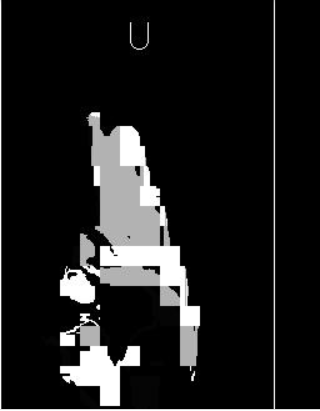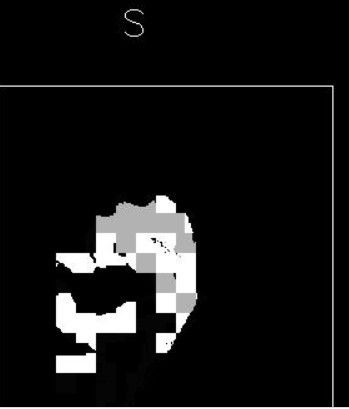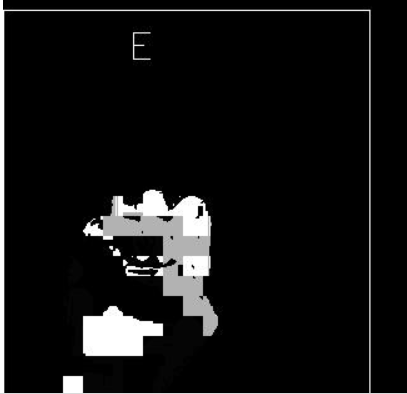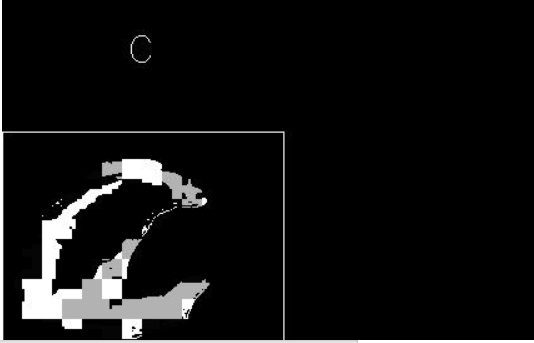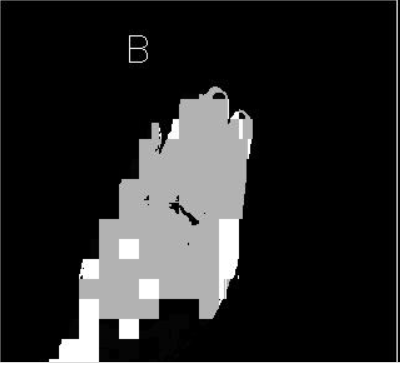

Je pense que je pourrais améliorer mon résultat en passant à un CNN.

# Task 7 : CNN

Pour utiliser le CNN je vais utiliser des images 32 par 32. 

## Import des images : 

In [ ]:
!cp /content/drive/MyDrive/MAM4/S2/TORES-ComputerVision/Zip/My_dataset_32_Zip.zip /content

In [ ]:
!unzip /content/My_dataset_32_Zip.zip -d /content/dataset 

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: /content/dataset/My_dataset_32/E_32/491tournee.jpg  
  inflating: /content/dataset/My_dataset_32/E_32/499tournee.jpg  
  inflating: /content/dataset/My_dataset_32/S_32/498.jpg  
  inflating: /content/dataset/My_dataset_32/S_32/495tournee.jpg  
  inflating: /content/dataset/My_dataset_32/S_32/499.jpg  
  inflating: /content/dataset/My_dataset_32/S_32/500tournee.jpg  
  inflating: /content/dataset/My_dataset_32/S_32/497tournee.jpg  
  inflating: /content/dataset/My_dataset_32/E_32/497tournee.jpg  
  inflating: /content/dataset/My_dataset_32/E_32/498tournee.jpg  
  inflating: /content/dataset/My_dataset_32/S_32/498tournee.jpg  
  inflating: /content/dataset/My_dataset_32/S_32/496tournee.jpg  
  inflating: /content/dataset/My_dataset_32/E_32/494tournee.jpg  
  inflating: /content/dataset/My_dataset_32/E_32/493tournee.jpg  
  inflating: /content/dataset/My_dataset_32/S_32/497.jpg  
  inflating: /conte

## Séparation de la base de données en training set et validation set

In [ ]:
img_height, img_width = 32, 32 #taille de l'image
batch_size=32 # taille d'un mini batch

### Training set : 

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/dataset/My_dataset_32',
  validation_split=0.2,
  subset="training",
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5010 files belonging to 5 classes.
Using 4008 files for training.


### Validation set :

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/dataset/My_dataset_32',
  validation_split=0.2,
  subset="validation",
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5010 files belonging to 5 classes.
Using 1002 files for validation.


In [ ]:
class_names = train_ds.class_names #nom des classes que nous voulons prédire

### Apperçu de notre jeu de données : 

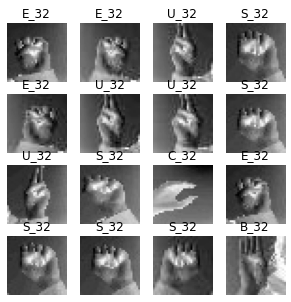

In [ ]:
plt.figure(figsize=(5, 5)) # initialise une figure
for images, labels in train_ds.take(1): # on parcourt notre training set
  for i in range(16): # On affiche 16 images puis on sort des boucles
    ax = plt.subplot(4, 4, i + 1) # permet d'avoir une grille d'images
    plt.imshow(images[i].numpy().astype("uint8").squeeze(), cmap=plt.cm.binary)
    plt.title(class_names[labels[i]])
    plt.axis("off")
  break

### Création de notre CNN : 

Relu activation : Rectified Linear Activation Function

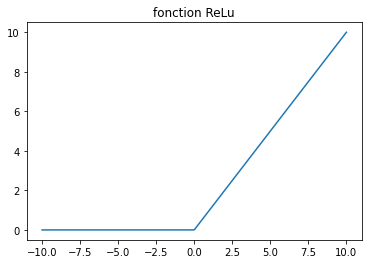

In [ ]:
def relu(x):
  n = len(x)
  z = np.zeros(n)
  return np.maximum(z, x)

x = np.linspace(-10,10,500)
y = relu(x)
plt.plot(x,relu(x));
plt.title("fonction ReLu");

layers.Dropout(0.2) permet de fixer à 0 20% des poids de la couche, permet d'éviter le sur-entrainement.

layers.MaxPooling2D((2, 2)) permet de réduire la dimension de l'image. On prend la valeur maximale pour chaque bloc 2 par 2 de l'image 

In [ ]:
model = Sequential([
    # 32 convolutional filters of size 3 x 3, 'relu activation', 
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1), padding='same'),
    # 2 X 2 max pooling layer : permet de réduire la dimension de l'image
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    # Met 20% des poids à 0
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    # On prend la moyenne des pixels de l'image
    layers.GlobalAvgPool2D(),
    # Couche dense activée par la fonction ReLu
    layers.Dense(64, activation='relu'),
    # Output layer
    layers.Dense(5)
])


Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #fonction cout
              metrics=['accuracy'])

In [ ]:
model.summary() # affiche un résumé de notre modèle

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0

In [ ]:
history = model.fit(train_ds, epochs=5, validation_data=val_ds) # entraine notre modèle

Epoch 1/5
126/126 [==============================] - 35s 16ms/step - loss: 2.5822 - accuracy: 0.3771 - val_loss: 0.0173 - val_accuracy: 0.9990
Epoch 2/5
126/126 [==============================] - 2s 14ms/step - loss: 0.0337 - accuracy: 0.9943 - val_loss: 0.0022 - val_accuracy: 0.9990
Epoch 3/5
126/126 [==============================] - 2s 14ms/step - loss: 0.0089 - accuracy: 0.9976 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4/5
126/126 [==============================] - 2s 13ms/step - loss: 0.0065 - accuracy: 0.9981 - val_loss: 7.1639e-04 - val_accuracy: 1.0000
Epoch 5/5
126/126 [==============================] - 2s 13ms/step - loss: 0.0134 - accuracy: 0.9949 - val_loss: 0.0016 - val_accuracy: 0.9990


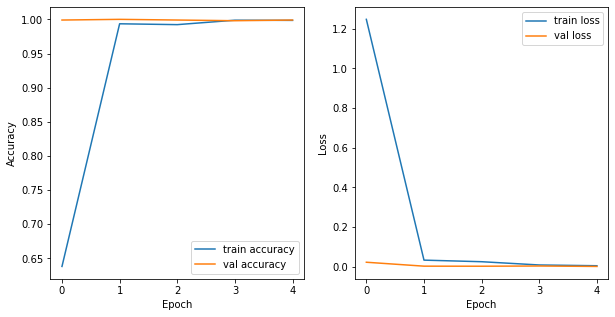

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train accuracy') # affiche la précision sur le training set
plt.plot(history.history['val_accuracy'], label = 'val accuracy') #affiche la précision sur le validation set
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right') # legende en bas à droite
plt.title("Evolution of the accuracy throw epochs")
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss') # affiche l'erreur sur le training set
plt.plot(history.history['val_loss'], label = 'val loss') # affiche l'erreur sur le validation set
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Evolution of the loss throw epochs")
plt.legend(loc='upper right') #legende en haut à droite

On remarque qu'en seulement 5 étapes notre modèle est très efficace sur le training set et sur le validation set. En effet il atteint presque 100% sur le validation set.

### Enregistrement de notre modèle

In [ ]:
model_json = model.to_json()
with open("/content/model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("/content/model_weights.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
!mv /content/model.json /content/model_CNN.json #renomme les modeles
!mv /content/model_weights.h5 /content/model_weights_CNN.h5

J'ai enregistrer les modèles sur google drive dans le dossier Modeles.


In [ ]:
# charge notre modele
json_file = open('/content/drive/MyDrive/MAM4/S2/TORES-ComputerVision/Modeles/model_CNN.json', 'r') # ouvre le fichier
loaded_model_json = json_file.read() # lit le fichier
json_file.close() # ferme le fichier
model = model_from_json(loaded_model_json) # creation du modele
# charge les poids
model.load_weights("/content/drive/MyDrive/MAM4/S2/TORES-ComputerVision/Modeles/model_weights_CNN.h5") # mise à jour des poids

# On test notre modèle en direct

In [ ]:
from PIL import ImageDraw
from keras.preprocessing import image
# font
font = cv2.FONT_HERSHEY_SIMPLEX
  
# org
org = (50, 50)
lettre_dico = {0 : 'B', 1 : 'C', 2 : 'E', 3 : 'S', 4 : 'U'}

# fontScale
fontScale = 1

VideoCapture()
eval_js('create()')

# Critère d'arrêt : 
#  si on a fait 10 itération
# ou
#  si la moyenne calculée ne bouge plus assez 
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )


byte = eval_js('capture()') # prend une capture
im = b64_to_bytes(byte) # transformation
im_w = im.shape[1] # largeur de l'image
im_h = im.shape[0] # hauteur de l'image
tracking_window_hand = (0,0,im_w, im_h)
cpt = -1
while cpt < 20: # on va faire 20 prédictions
  byte = eval_js('capture()') # Take a capture
  img = b64_to_bytes(byte)

  # On passe du domaine RGB au domaine HSV
  hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

  #Creation d'un mask: on limite la saturation entre 64 et 255, la brillance entre 32 et 200
  mask = cv2.inRange(hsv, np.array((0.,64.,32.)), np.array((180.,255.,200.)))


  # On projette l'histogramme de la zone de visage sur l'image. 
  # On utilise uniquement le canal 0 (=Hue), entre 0 et 180 avec une échelle de 1
  prob = cv2.calcBackProject([hsv] , [0], frame_hist, [0,180], scale = 1)
  
  # bit a bit entre la projection et le mask pour enlever les pixel trop brillant ou trop foncé
  prob = prob & mask
  

  # on calcule le camshift
  bbox, tracking_window_face = cv2.CamShift(prob, tracking_window_face , term_crit)

  # permet d'augmenter la taille du rectangle pour être certain de couvrir tout notre visage
  pts = cv2.boxPoints(bbox).astype(np.int)
  sc = scale_contour(pts, 1.5, 1.5)

  # met notre visage en noir 
  cv2.fillPoly(prob, [sc], 0) 

  # on regarde ou se trouve notre visage
  (x,y,w,h) = tracking_window_face
  #on va mettre en noir le dessus et dessous de notre tête
  margin = 10
  lignes_bas = max(0, y-margin)
  lignes_haut = min(im_h, y+h+margin)
  col_bas = max(0, x-margin)
  col_haut = min(im_w, x+w+margin)
  

  #on met en noir toute la zone au dessus de notre tete
  prob[0:lignes_bas, 0:im_w] = 0

  #on met en noir toute la zone en dessous de notre tete
  prob[lignes_haut:im_h, 0:im_w] = 0
  

  #detection de la main
  bbox2, tracking_window_hand = cv2.CamShift(prob, tracking_window_hand, term_crit)
  
  # on ajuste la taille de la boite autour de notre main
  pts2 = cv2.boxPoints(bbox2).astype(np.int)
  pts2 = scale_contour(pts2,2,2)

  

  # on prend un rectangle "droit"
  cropped_hand_bbox = crop_hand(pts2, im_w,im_h)

  x1 = cropped_hand_bbox[0][0]
  y1 = cropped_hand_bbox[0][1]
  x2 = cropped_hand_bbox[1][0]
  y2 = cropped_hand_bbox[1][1]

  # on affiche un rectancle blanc autour de note main
  cv2.rectangle(prob,(x1,y1),  (x2,y2), (255,0,0))
  
  cropped_hand = cv2.cvtColor(im[y1:y2, x1:x2],cv2.COLOR_RGB2GRAY)
  
  # on augmente le nombre d'images qu'on a essaye de predire
  cpt +=1
  
  #*********************************************** taille 32 *****************************
  # on ajuste la taille
  cropped_hand32 = cv2.resize(cropped_hand,(32,32))
  x = image.img_to_array(cropped_hand32)
  x = np.expand_dims(x,axis=0)

  images = np.vstack([x]) #vecteur d'images pour la prediction
  classes = model.predict_classes(images, batch_size = 1) #prediction

  lettre = lettre_dico[classes[0]]




  cv2.putText(prob, lettre,org = (100,50), fontFace=font, fontScale = fontScale, color = 255)

  #*********** on affiche l'image en noir et blanc pour être certain de bien detecter la main ******
  eval_js('showimg("{}")'.format(bytes_to_b64(prob)))

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Avec le modèle CNN j'arrive mieux à prédire les images en direct. 

Lorsque je fais un C il le reconnait très souvent.

Lorsque je fais un B il le reconnait aussi très souvent.

Lorsque je fais un E il reconnait plus un C.

Lorsque je fais un S, des fois il le reconnait ou des fois il prédit C.

Lorsque je fais un U il reconnait souvent un B

Pour améliorer ce réseau je pense que comme pour le réseau MLP il aurait fallu que je prenne plus de photos dans différentes conditions pour avoir plus de variation. Peut être que j'aurais du entrainer le réseau jusqu'à obtenir 1 pour la précision sur le test de validation. J'avais peur que si je réalisais plus d'epochs par exemple que ma précision augmente sur le training set mais pas sur le validation et donc que mon réseau soit sur entrainé.